In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

SEED = 0

In [3]:
data = pd.read_csv("creditcard.csv", header=0)
#print(data.info())

In [4]:
#Handle Duplicated values
print("Duplicates", data.duplicated().sum())
data = data.drop_duplicates()
print("Rows {}, Columns {}".format(data.shape[0], data.shape[1]))

Duplicates 1081
Rows 283726, Columns 31


In [5]:
x_data = data.drop(columns=["Class"])
y_data = data["Class"]
X_train, X_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.3, random_state=SEED )

In [6]:
# define model
model = DecisionTreeClassifier()
# define grid
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.758711 using {'class_weight': {0: 1, 1: 10}}


In [8]:
# define model
model = DecisionTreeClassifier(class_weight={0:1,1:10})
# define grid
#balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
#param_grid = dict(class_weight=balance)
# define evaluation procedure
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)
# define grid search
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')
# execute the grid search
model_dt = model.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.758711 using {'class_weight': {0: 1, 1: 10}}


In [9]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84986
           1       0.74      0.72      0.73       132

    accuracy                           1.00     85118
   macro avg       0.87      0.86      0.86     85118
weighted avg       1.00      1.00      1.00     85118



Confusion matrix:
[[84952    37]
 [   34    95]]


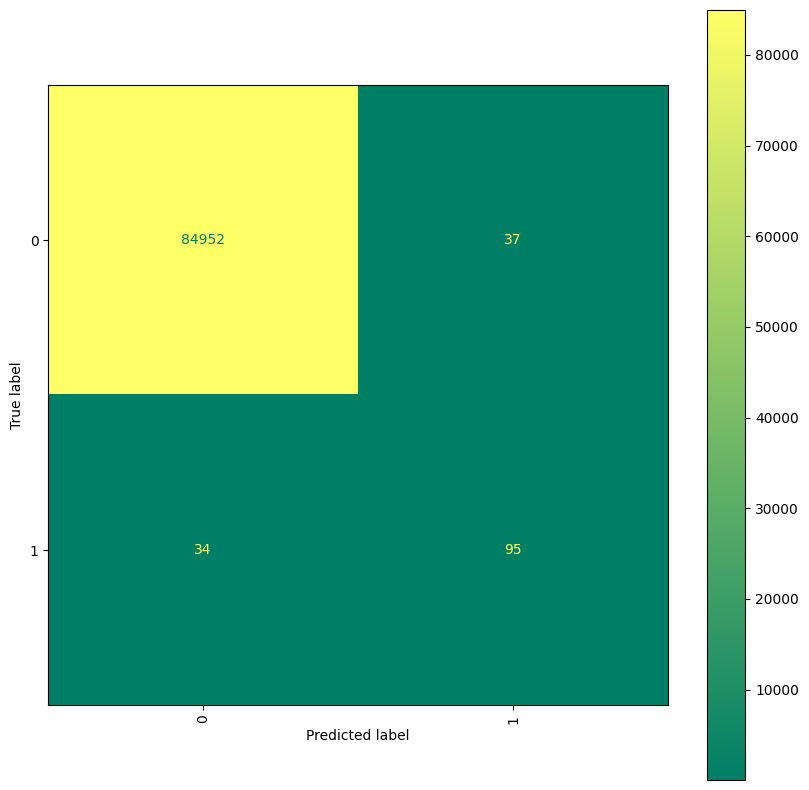

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=[0,1])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')
plt.show()